<a href="https://colab.research.google.com/github/jyothishx/Introduction-to-Python/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = files.upload()

Saving titanic.csv to titanic.csv


In [4]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
count = len(dataset)
print(count)

891


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
print('Median of age column : %.2f' %(dataset['Age']).median(skipna=True))
print('Percentage of missing records in the cabin column : %.2f %%'%(dataset['Cabin'].isnull().sum()/len(dataset)*100))
print('Most common boarding port of embarkation : %s' %dataset['Embarked'].value_counts().idxmax())

Median of age column : 28.00
Percentage of missing records in the cabin column : 77.10 %
Most common boarding port of embarkation : S


In [35]:
dataset['Age'].fillna(dataset['Age'].median(skipna=True),inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].value_counts().idxmax(),inplace=True)
dataset.drop('Cabin', axis = 1, inplace=True)

KeyError: ignored

In [36]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
dataset.drop('PassengerId', axis = 1, inplace=True)
dataset.drop('Name',axis=1, inplace=True)
dataset.drop('Ticket', axis=1, inplace=True)

In [40]:
dataset['TravelAlone'] = np.where((dataset['SibSp'] + dataset['Parch'])>0,0,1)

In [41]:
dataset.drop('SibSp', axis=1, inplace=True)
dataset.drop('Parch', axis = 1, inplace=True)

In [45]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [43]:
dataset.shape

(891, 7)

In [44]:
dataset.info

<bound method DataFrame.info of      Survived  Pclass     Sex   Age     Fare Embarked  TravelAlone
0           0       3    male  22.0   7.2500        S            0
1           1       1  female  38.0  71.2833        C            0
2           1       3  female  26.0   7.9250        S            1
3           1       1  female  35.0  53.1000        S            0
4           0       3    male  35.0   8.0500        S            1
..        ...     ...     ...   ...      ...      ...          ...
886         0       2    male  27.0  13.0000        S            1
887         1       1  female  19.0  30.0000        S            1
888         0       3  female  28.0  23.4500        S            0
889         1       1    male  26.0  30.0000        C            1
890         0       3    male  32.0   7.7500        Q            1

[891 rows x 7 columns]>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


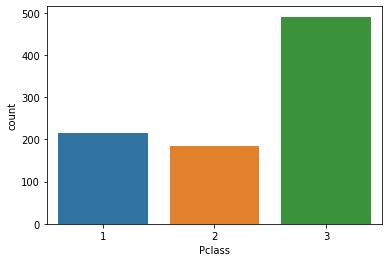

In [46]:
sns.countplot('Pclass', data=dataset)

In [50]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

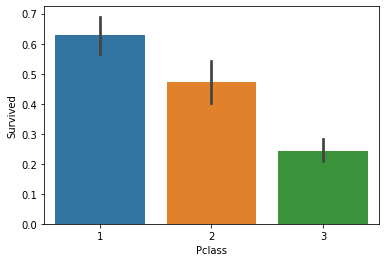

In [52]:
sns.barplot(x= 'Pclass', y = "Survived", data = dataset)

In [53]:
dataset.groupby('Pclass',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363
